In [2]:
import sys
sys.path.append('../')

In [5]:
import xarray as xr
ds = xr.open_dataset('../features_xy.nc')
ds

<xarray.Dataset>
Dimensions:     (time: 13514)
Coordinates:
  * time        (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2017-12-31
Data variables:
    cp          (time) float32 ...
    lsp         (time) float32 ...
    swvl1       (time) float32 ...
    ro          (time) float32 ...
    sd          (time) float32 ...
    sd_diff     (time) float32 ...
    lsp-4-11    (time) float32 ...
    lsp-12-25   (time) float32 ...
    lsp-26-55   (time) float32 ...
    lsp-56-180  (time) float32 ...
    lsp-1       (time) float32 ...
    lsp-2       (time) float32 ...
    lsp-3       (time) float32 ...
    cp-1        (time) float32 ...
    cp-2        (time) float32 ...
    cp-3        (time) float32 ...
    dis         (time) float64 ...
    dis_diff    (time) float64 ...

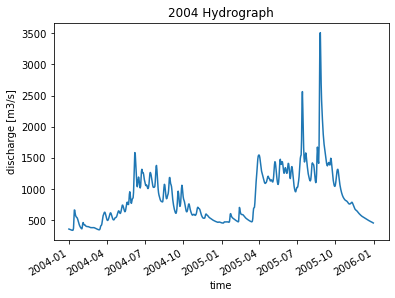

In [12]:
import matplotlib.pyplot as plt
ds['dis'].loc[dict(time=slice('2004', '2005'))].plot()

plt.title("2004 Hydrograph")

plt.savefig('../images/2004discharge.png', bbox_inches='tight', dpi=600)

In [13]:
from functions.floodmodel_utils import reshape_scalar_predictand

#Selecting our X and y values from the dataset. Y has the river discharge values
y_orig = ds['dis']
y = y_orig.copy()
X = ds.drop(['dis', 'dis_diff'])


Xda, yda = reshape_scalar_predictand(X, y)

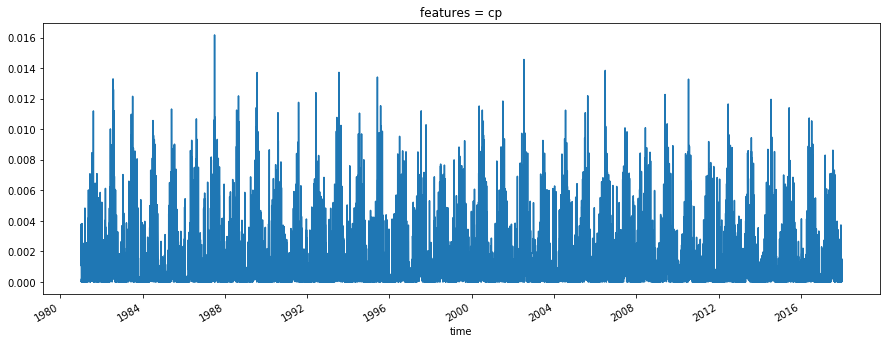

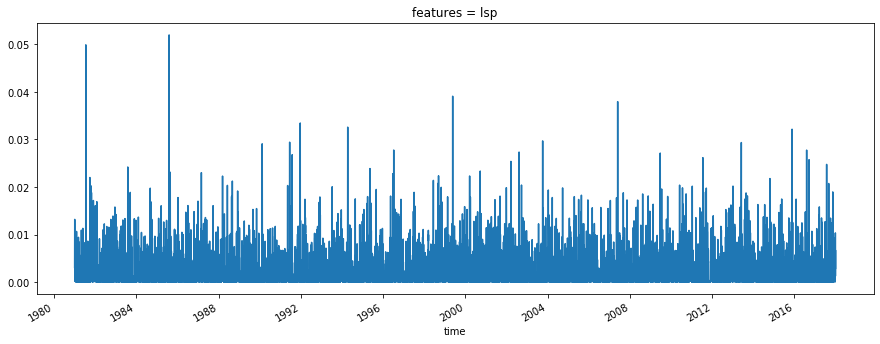

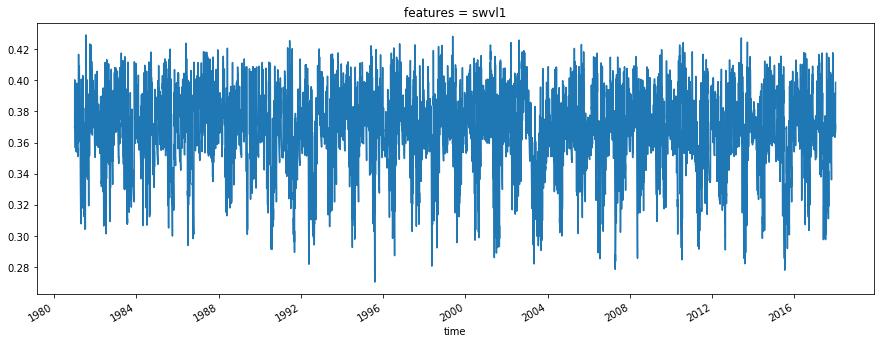

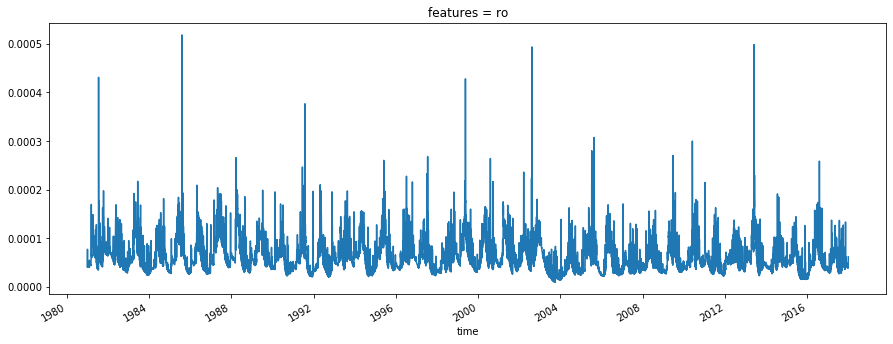

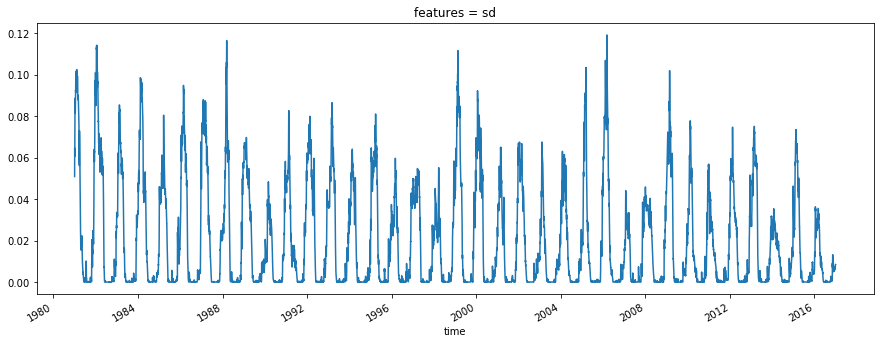

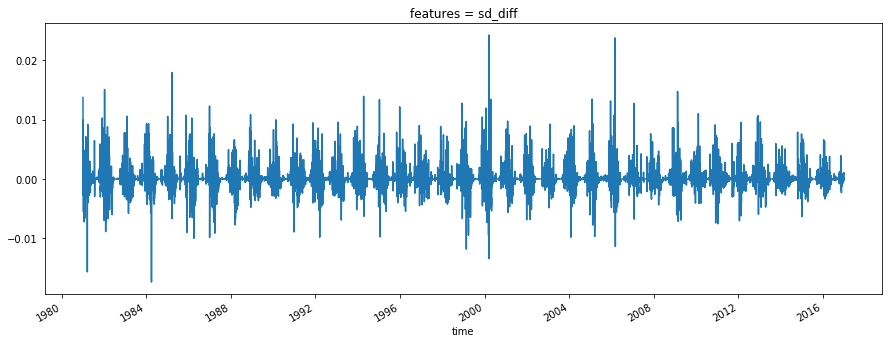

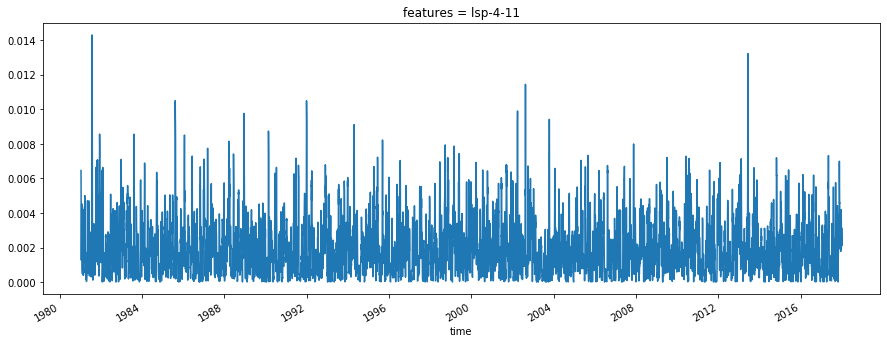

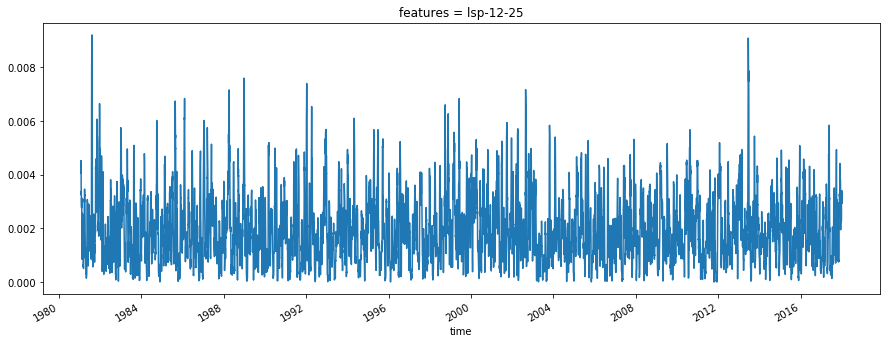

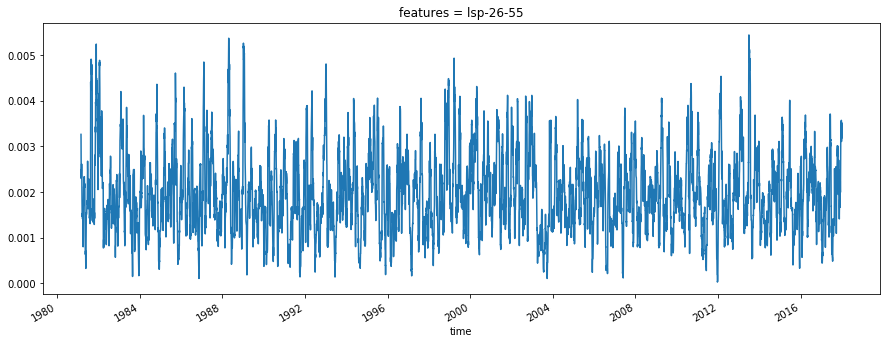

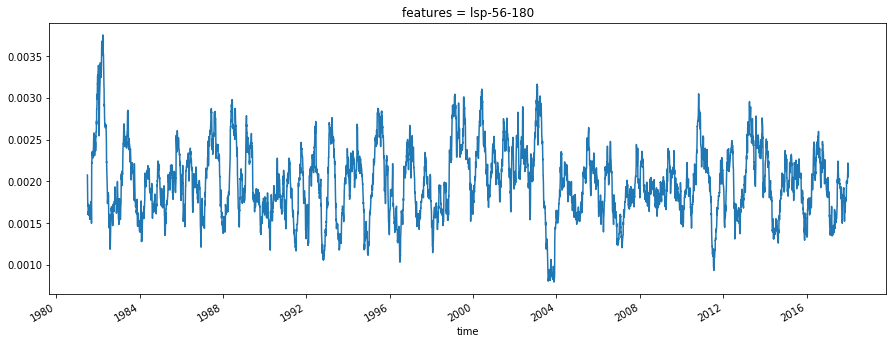

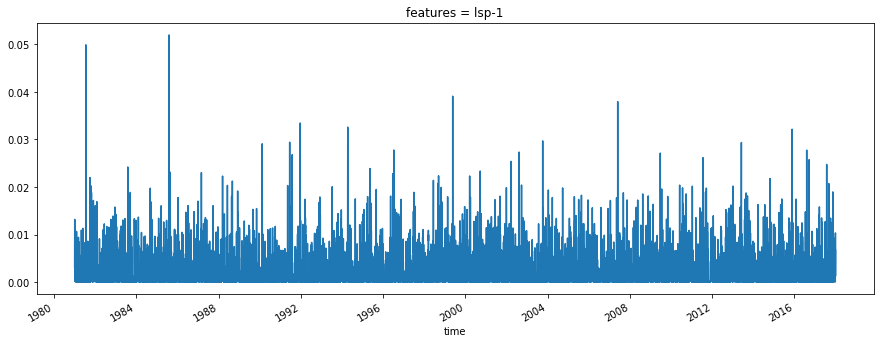

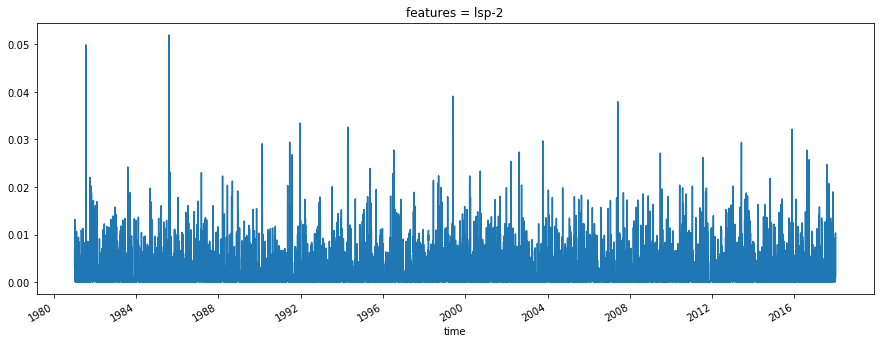

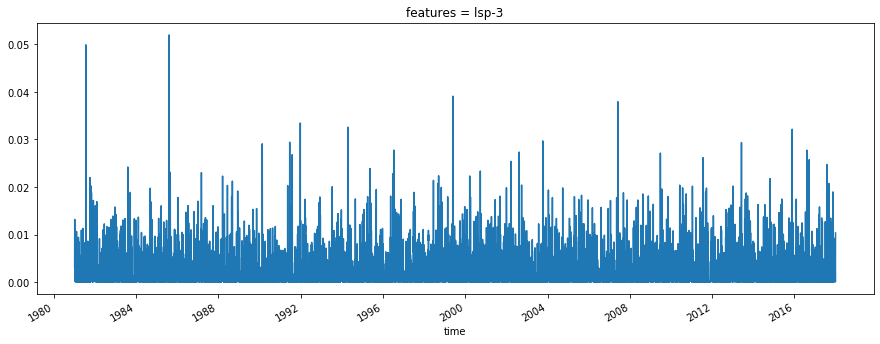

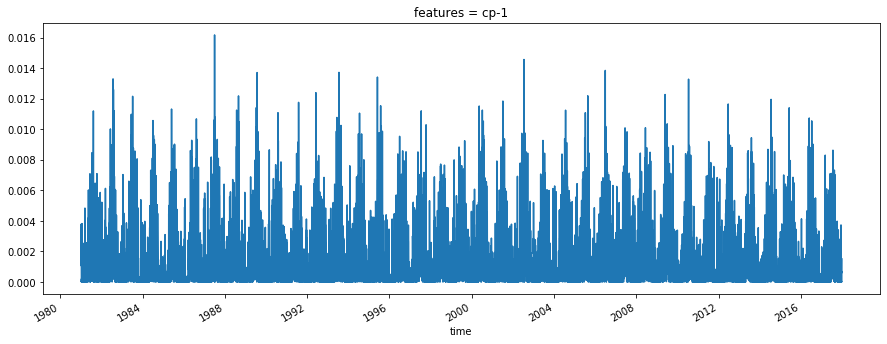

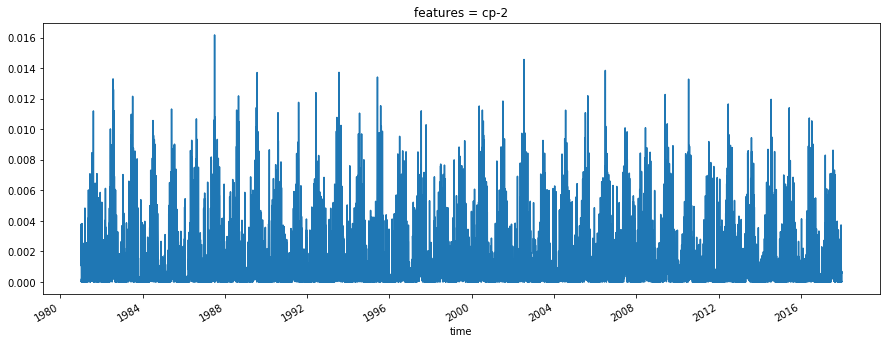

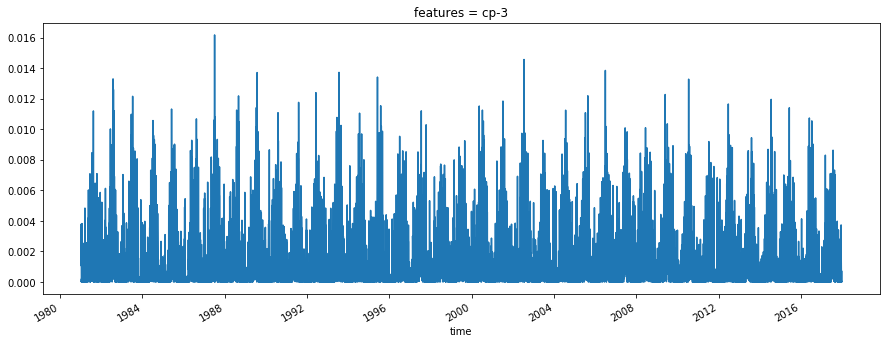

In [14]:
visualization = X.to_array(dim='features').T
for f in visualization.features:
    plt.figure(figsize=(15,5))
    visualization.sel(features=f).plot(ax=plt.gca())
    plt.savefig('../images/features/' + str(f) + '.png')

In [ ]:
# #Taking the average latitude and longitude if necessary
# era5 = era5.mean(['latitude','longitude'])
# glofas = glofas.mean(['lat','lon'])
# #Visualizing the features
# #Converting to a dataarray
# era5visualization = era5.to_array(dim='features').T
# glofasvisualization = glofas.to_array(dim='features').T
# import matplotlib.pyplot as plt
# for f in era5visualization.features:
#     plt.figure(figsize=(15,5))
#     era5visualization.sel(features=f).plot(ax=plt.gca())
#     plt.savefig('./images/'+str(f)+ 'era5'+'.png', dpi=600, bbox_inches='tight')
#     plt.savefig('./images/danube/'+str(f)+ 'era5'+'.png', dpi=600, bbox_inches='tight')


# for f in glofasvisualization.features:
#     plt.figure(figsize=(15,5))
#     glofasvisualization.sel(features=f).plot(ax=plt.gca())
#     plt.savefig('./images/glofasvisualization'+str(f)+'.png', dpi=600, bbox_inches='tight')
#     plt.savefig('./images/danube/glofasvisualization'+str(f)+'.png', dpi=600, bbox_inches='tight')
